In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
edificacion = pd.read_csv('dataset_v1')

In [3]:
edificacion.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,802906,6,487,12198,2,30,6,5,t,...,False,False,False,False,False,False,False,False,False,3
1,1,28830,8,900,2812,2,10,8,7,o,...,False,False,False,False,False,False,False,False,False,2
2,2,94947,21,363,8973,2,10,5,5,t,...,False,False,False,False,False,False,False,False,False,3
3,3,590882,22,418,10694,2,10,6,5,t,...,False,False,False,False,False,False,False,False,False,2
4,4,201944,11,131,1488,3,30,8,9,t,...,False,False,False,False,False,False,False,False,False,3


In [4]:
edificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 41 columns):
Unnamed: 0                                260601 non-null int64
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-

## Analisis sobre la relación entre los tipos de materiales en las edificaciones y si posee un uso secundario o no

In [5]:
edificacion_sin_uso_secundario = edificacion.loc[edificacion['has_secondary_use']==False,['has_superstructure_adobe_mud',\
                'has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick',\
                'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',\
                'has_superstructure_bamboo','has_superstructure_rc_non_engineered',\
                'has_superstructure_rc_engineered','has_superstructure_other'     
]]

In [6]:
def cantidad(df,columna,vof):
    return df.loc[df[columna]==vof,[columna]].count().tolist()[0];

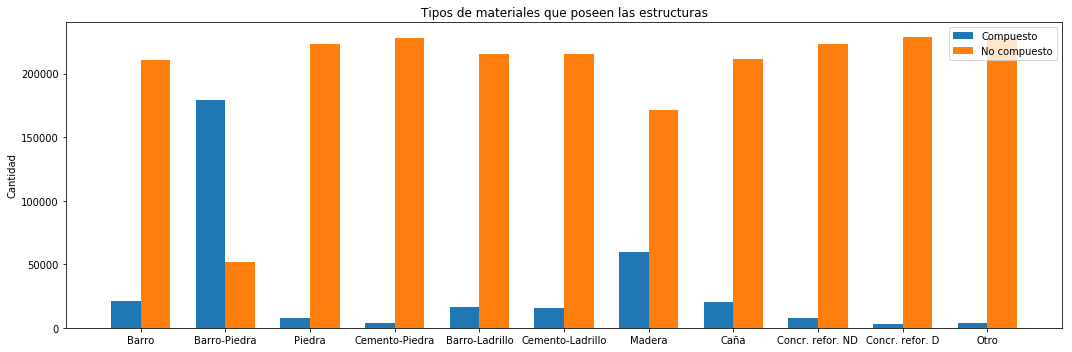

In [7]:
labels = ['Barro','Barro-Piedra','Piedra','Cemento-Piedra','Barro-Ladrillo',\
         'Cemento-Ladrillo','Madera','Caña','Concr. refor. ND',\
         'Concr. refor. D','Otro']
true_counts = [cantidad(edificacion_sin_uso_secundario,'has_superstructure_adobe_mud',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_mud_mortar_stone',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_stone_flag',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_cement_mortar_stone',True),\
             cantidad(edificacion_sin_uso_secundario,'has_superstructure_mud_mortar_brick',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_cement_mortar_brick',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_timber',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_bamboo',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_rc_non_engineered',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_rc_engineered',True),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_other',True)
             ]
              
false_counts = [cantidad(edificacion_sin_uso_secundario,'has_superstructure_adobe_mud',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_mud_mortar_stone',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_stone_flag',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_cement_mortar_stone',False),\
             cantidad(edificacion_sin_uso_secundario,'has_superstructure_mud_mortar_brick',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_cement_mortar_brick',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_timber',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_bamboo',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_rc_non_engineered',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_rc_engineered',False),\
              cantidad(edificacion_sin_uso_secundario,'has_superstructure_other',False)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width/2, true_counts, width, label='Compuesto')
rects2 = ax.bar(x + width/2, false_counts, width, label='No compuesto')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_title('Tipos de materiales que poseen las estructuras')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()


In [10]:
edificacion_sin_uso_secundario['has_superstructure_adobe_mud'].value_counts()

False    210618
True      20827
Name: has_superstructure_adobe_mud, dtype: int64

In [11]:
edificacion_con_uso_secundario = edificacion.loc[edificacion['has_secondary_use']==True,['has_superstructure_adobe_mud',\
                'has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick',\
                'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',\
                'has_superstructure_bamboo','has_superstructure_rc_non_engineered',\
                'has_superstructure_rc_engineered','has_superstructure_other'     
]]

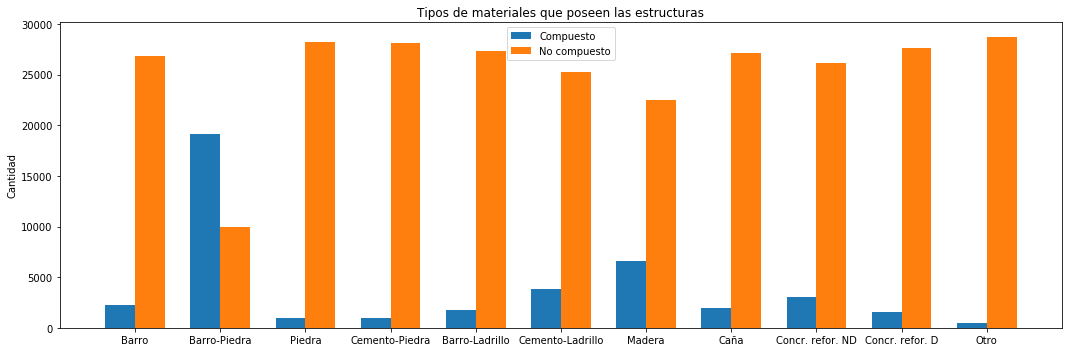

In [12]:
labels = ['Barro','Barro-Piedra','Piedra','Cemento-Piedra','Barro-Ladrillo',\
         'Cemento-Ladrillo','Madera','Caña','Concr. refor. ND',\
         'Concr. refor. D','Otro']
true_counts = [cantidad(edificacion_con_uso_secundario,'has_superstructure_adobe_mud',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_mud_mortar_stone',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_stone_flag',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_cement_mortar_stone',True),\
             cantidad(edificacion_con_uso_secundario,'has_superstructure_mud_mortar_brick',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_cement_mortar_brick',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_timber',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_bamboo',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_rc_non_engineered',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_rc_engineered',True),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_other',True)
             ]
              
false_counts = [cantidad(edificacion_con_uso_secundario,'has_superstructure_adobe_mud',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_mud_mortar_stone',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_stone_flag',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_cement_mortar_stone',False),\
             cantidad(edificacion_con_uso_secundario,'has_superstructure_mud_mortar_brick',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_cement_mortar_brick',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_timber',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_bamboo',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_rc_non_engineered',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_rc_engineered',False),\
              cantidad(edificacion_con_uso_secundario,'has_superstructure_other',False)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width/2, true_counts, width, label='Compuesto')
rects2 = ax.bar(x + width/2, false_counts, width, label='No compuesto')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_title('Tipos de materiales que poseen las estructuras')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()


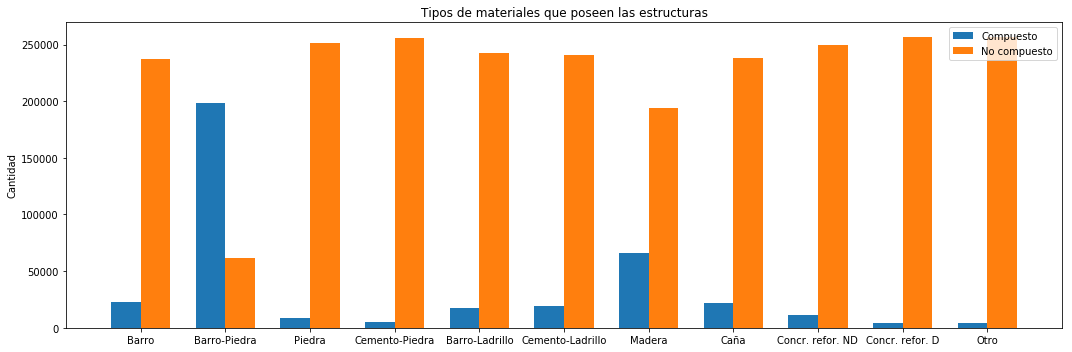

In [14]:
labels = ['Barro','Barro-Piedra','Piedra','Cemento-Piedra','Barro-Ladrillo',\
         'Cemento-Ladrillo','Madera','Caña','Concr. refor. ND',\
         'Concr. refor. D','Otro']
true_counts = [cantidad(edificacion,'has_superstructure_adobe_mud',True),\
              cantidad(edificacion,'has_superstructure_mud_mortar_stone',True),\
              cantidad(edificacion,'has_superstructure_stone_flag',True),\
              cantidad(edificacion,'has_superstructure_cement_mortar_stone',True),\
             cantidad(edificacion,'has_superstructure_mud_mortar_brick',True),\
              cantidad(edificacion,'has_superstructure_cement_mortar_brick',True),\
              cantidad(edificacion,'has_superstructure_timber',True),\
              cantidad(edificacion,'has_superstructure_bamboo',True),\
              cantidad(edificacion,'has_superstructure_rc_non_engineered',True),\
              cantidad(edificacion,'has_superstructure_rc_engineered',True),\
              cantidad(edificacion,'has_superstructure_other',True)
             ]
              
false_counts = [cantidad(edificacion,'has_superstructure_adobe_mud',False),\
              cantidad(edificacion,'has_superstructure_mud_mortar_stone',False),\
              cantidad(edificacion,'has_superstructure_stone_flag',False),\
              cantidad(edificacion,'has_superstructure_cement_mortar_stone',False),\
             cantidad(edificacion,'has_superstructure_mud_mortar_brick',False),\
              cantidad(edificacion,'has_superstructure_cement_mortar_brick',False),\
              cantidad(edificacion,'has_superstructure_timber',False),\
              cantidad(edificacion,'has_superstructure_bamboo',False),\
              cantidad(edificacion,'has_superstructure_rc_non_engineered',False),\
              cantidad(edificacion,'has_superstructure_rc_engineered',False),\
              cantidad(edificacion,'has_superstructure_other',False)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width/2, true_counts, width, label='Compuesto')
rects2 = ax.bar(x + width/2, false_counts, width, label='No compuesto')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_title('Tipos de materiales que poseen las estructuras')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()


Se puede ver que no se puede deducir que el uso secundario, que tiene la edificacion, influya en el tipo de material por el que esta compuesto. Ya que los materiales dominantes no utilizados se mantienen practicamente constantes en los 3 graficos. Puede existir algun otro factor con el que se pueda analizar.